In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
edge_list = [
    ['A','B'],
    ['A','C'],
    ['A','D'],
    ['A','H'],
    ['C','E'],
    ['D','E'],
    ['D','F'],
    ['D','G'],
    ['E','G'],
    ['F','G'],
    ['F','H'],
    ['G','H'],
    ['G','I'],
    ['G','J'],
    ['G','K'],
    ['G','L'],
    ['G','M'],
    ['H','I'],
    ['L','M']
]

In [3]:
G = nx.Graph(edge_list)

In [4]:
nodes = list(G.nodes())
print(nodes)

['A', 'B', 'C', 'D', 'H', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M']


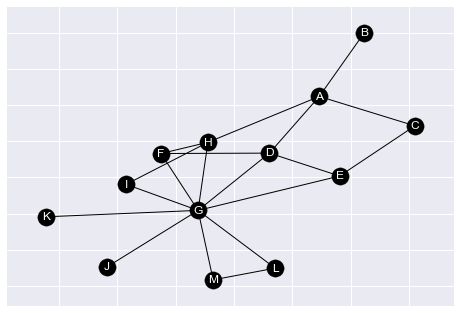

In [5]:
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,edge_color='black',node_color='black',font_color='white')
plt.show()

### Katz Index

The metric defined by Katz not only considers the path between specific neighbor nodes, rather, sums over the sets of paths and exponentially damped by length to be counted more intensively with shorter paths.

$s^{KI}_{(x,y)} = \sum_{i=1}^\infty β^{i}.|A_{xy}^{<i>}|$

Here, β is free parameter (β > 0) and called the "damping factor".
One can realize that KI yields very similar score when β is low
enough, because the paths which have higher lengths contribute
less, and similarity index is simply determined by the shorter paths.

In the case of β < 1/$λ^{A}_{I}$ is the largest eigenvalue of
adjacency matrix, the similarity matrix can be written as follows:

$S^{KI} = (I - βA)^{-1} - I$

In [6]:
# Finding Maximum Eigen Value

L = nx.normalized_laplacian_matrix(G)
eigen_values = np.linalg.eigvals(L.A)

print("Eigen Values of Matrix :")
print(eigen_values)
print("Maximum Eigen Value :",max(eigen_values))

Eigen Values of Matrix :
[2.22044605e-16 2.91568764e-01 1.83773521e+00 5.40255290e-01
 6.15765886e-01 1.64168490e+00 8.00888230e-01 8.41528154e-01
 1.15318135e+00 1.33605565e+00 1.44133656e+00 1.50000000e+00
 1.00000000e+00]
Maximum Eigen Value : 1.8377352077552436


In [7]:
# Finding Beta
beta = 1/max(eigen_values)

# Creating Identity Matrix
I = np.identity(len(nodes))

# Adjency Matrix
adj_matrix = nx.to_numpy_array(G)

# Epsilon
epsilon = 0.00001

In [8]:
KatzScore = np.linalg.inv(I - beta * adj_matrix) - I

KatzScore_df = pd.DataFrame(KatzScore,columns=list(G.nodes),index = list(G.nodes))

In [9]:
# Katz Method 
# Similarity Score for Each Node(u,v)
KatzScore_df

,A,B,C,D,H,E,F,G,I,J,K,L,M
A,-17.404469,-8.926459,-12.280212,-7.971905,-2.806228,-6.163309,-1.008060,8.925587,3.329837,4.856840,4.856840,10.654425,10.654425
B,-8.926459,-4.857315,-6.682253,-4.337896,-1.527004,-3.353753,-0.548534,4.856840,1.811924,2.642840,2.642840,5.797584,5.797584
C,-12.280212,-6.682253,-8.740908,-5.700416,-2.444200,-3.783263,-0.901070,6.488689,2.200801,3.530807,3.530807,7.745513,7.745513
D,-7.971905,-4.337896,-5.700416,-3.794585,-1.817353,-2.503951,-0.390989,3.893403,1.129679,2.118587,2.118587,4.647534,4.647534
H,-2.806228,-1.527004,-2.444200,-1.817353,-0.368549,-1.685564,-0.011954,1.163933,0.976955,0.633352,0.633352,1.389380,1.389380
E,-6.163309,-3.353753,-3.783263,-2.503951,-1.685564,-1.789327,-0.647868,2.998905,0.714652,1.631848,1.631848,3.579777,3.579777
F,-1.008060,-0.548534,-0.901070,-0.390989,-0.011954,-0.647868,-0.164057,0.101450,0.048699,0.055204,0.055204,0.121100,0.121100
G,8.925587,4.856840,6.488689,3.893403,1.163933,2.998905,0.101450,-5.870898,-2.017138,-2.650490,-2.650490,-5.814365,-5.814365
I,3.329837,1.811924,2.200801,1.129679,0.976955,0.714652,0.048699,-2.017138,-0.566013,-1.097622,-1.097622,-2.407847,-2.407847
J,4.856840,2.642840,3.530807,2.118587,0.633352,1.631848,0.055204,-2.650490,-1.097622,-1.442259,-1.442259,-3.163875,-3.163875


In [10]:
# Edges with Lowest Score

lowestScore = KatzScore_df.max().max()

for i in range(len(KatzScore)):
    for j in range(len(KatzScore[i])):
        if i < j:
            lowestScore = min(lowestScore,KatzScore[i][j])

            
edges_with_lowest_score = []
for i in range(len(KatzScore)):
    for j in range(len(KatzScore)):
        if i < j and abs(KatzScore[i][j]-lowestScore) < epsilon:
            edges_with_lowest_score.append([nodes[i],nodes[j]])
            
print("Lowest Score : ",lowestScore)
print("Edges with lowest score : ")
print(edges_with_lowest_score)

Lowest Score :  -12.280211925409086
Edges with lowest score : 
[['A', 'C']]


In [11]:
# Removing the edges with lowest score in graph
for edge in edges_with_lowest_score:
    G.remove_edge(edge[0],edge[1])

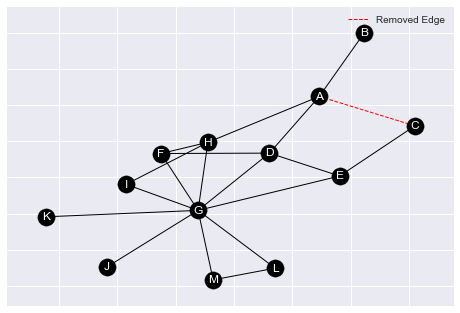

In [12]:
nx.draw_networkx(G,pos,edge_color='black',node_color='black',font_color='white')
nx.draw_networkx_edges(G,pos,edgelist=edges_with_lowest_score,edge_color='red',style='dashed',label="Removed Edge")
plt.legend()
plt.show()

In [13]:
# Disconnect Edges with Maximum Score

maxScore = KatzScore_df.min().min()

for i in range(len(KatzScore)):
    for j in range(len(KatzScore)):
        if i < j and adj_matrix[i][j] == 0:
            maxScore = max(maxScore,KatzScore[i][j])

disconnected_edges_with_max_score = []
for i in range(len(KatzScore)):
    for j in range(len(KatzScore[i])):
        if i == 0 and nodes[j] == 'M':
            print(maxScore,KatzScore[i][j])
        if i < j and adj_matrix[i][j] == 0 and abs(maxScore - KatzScore[i][j]) < epsilon:
            disconnected_edges_with_max_score.append([nodes[i],nodes[j]])
            

print("Maximum Score : ",maxScore)
print("Disconnected Edges with Maximum score : ")
print(disconnected_edges_with_max_score)

10.654424791062832 10.654424791062828
Maximum Score :  10.654424791062832
Disconnected Edges with Maximum score : 
[['A', 'L'], ['A', 'M']]


In [14]:
# Adding the edges(Disconnected Edges) with Maximum score in graph
for edge in disconnected_edges_with_max_score:
    G.add_edge(edge[0],edge[1])

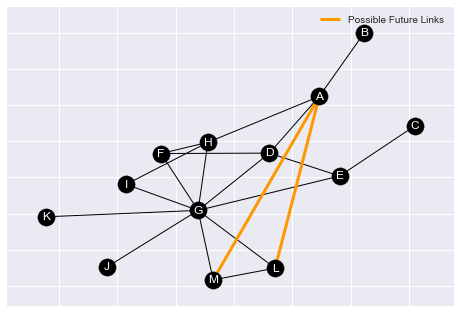

In [15]:
nx.draw_networkx(G,pos,edge_color='black',node_color='black',font_color='white')
nx.draw_networkx_edges(G,pos,edgelist=disconnected_edges_with_max_score,width=3,edge_color='#ff9800',label="Possible Future Links")
plt.legend()
plt.show()